# Series temporales de AERONET
Objetivo: mostrar la serie temporal interpolada de AOD550 de cada estación AERONET para el periodo 2015-2024

In [24]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
print("librerias ok")

librerias ok


In [4]:
# Funcion para la serie temporal AERONET
def aeronet_plot (path, date_format, nrows, ncols, colors,plot):
    '''
    La función permite graficar los promedios diarios de cada estación AERONET.
Los datos de cada estación de interés están contenidos en una carpeta en formato .csv previamente procesados.
Esta función recorre la carpeta y toma cada uno de estos archivos para luego generar el gráfico de interés.

Variables:
- path: ruta hacia la carpeta donde se encuentran los archivos en formato .csv
- date_format: formato de la columna de fecha del archivo de interés.
  Por ejemplo: date_format='%Y-%m-%d %H:%M:%S'
- nrows: número de filas que tendrá el gráfico
- ncols: número de columnas que tendrá el gráfico
- paleta de colores para cada una de las estaciones AERONET. Por ejemplo:
  colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    
    '''
    i=0 
    j=0 

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #Se recorre la carpeta donde se encuentran los archivos de cada estacion.
    for p, files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        # Se crea columna con la fecha llamada "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Se convierte en la columna indice
        data.set_index('Timestamp', inplace = True)
        # Media diaria (prueba mensual tambien)
        #data_mean  = data.resample('1D').mean()
        data_mean  = data['aod_550'].resample('1D').mean()
        #data_mean  = data['aod_550'].resample('1M').mean()
        #Se muestra solo este periodo
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Setear el nombre de las estaciones 
        station_name = files [2:4]
        #print(files)  
        mean = data_mean_period.mean()

       
        ########################                PLOT                ########################
      
        ax[i][j].plot(data_mean_period.index, data_mean_period,c=colors[p])
        # Linea de la media total
        ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
              
        # Texto en cada plot:
        # Media
        ax[i][j].text(data_mean_period.index[1],1.6, "Average =" +" "+ str(round(data_mean_period.mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 13})
                
        # SD texto
        ax[i][j].text(data_mean_period.index[1],1.45, "sd =" +" "+ str(round(data_mean_period.std(),2)), 
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 13})
        # N texto
        ax[i][j].text(data_mean_period.index[1],1.30, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 13})
        
        # Nombre de los ejes
        ax[i][j].set_xlabel(r'Date',size=13)
        ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=13)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        # Titulo de cada subplot corresponde a la sigla de la estacion AERONET
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
        # Formato para escribir la fecha
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.8)
        # Para que quede lindo seteamos las fechas
        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
    
        # Configuracion de los subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)

        print(station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Guardar el plot en el path local
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

SP
ST
BA
MD
LP
MX


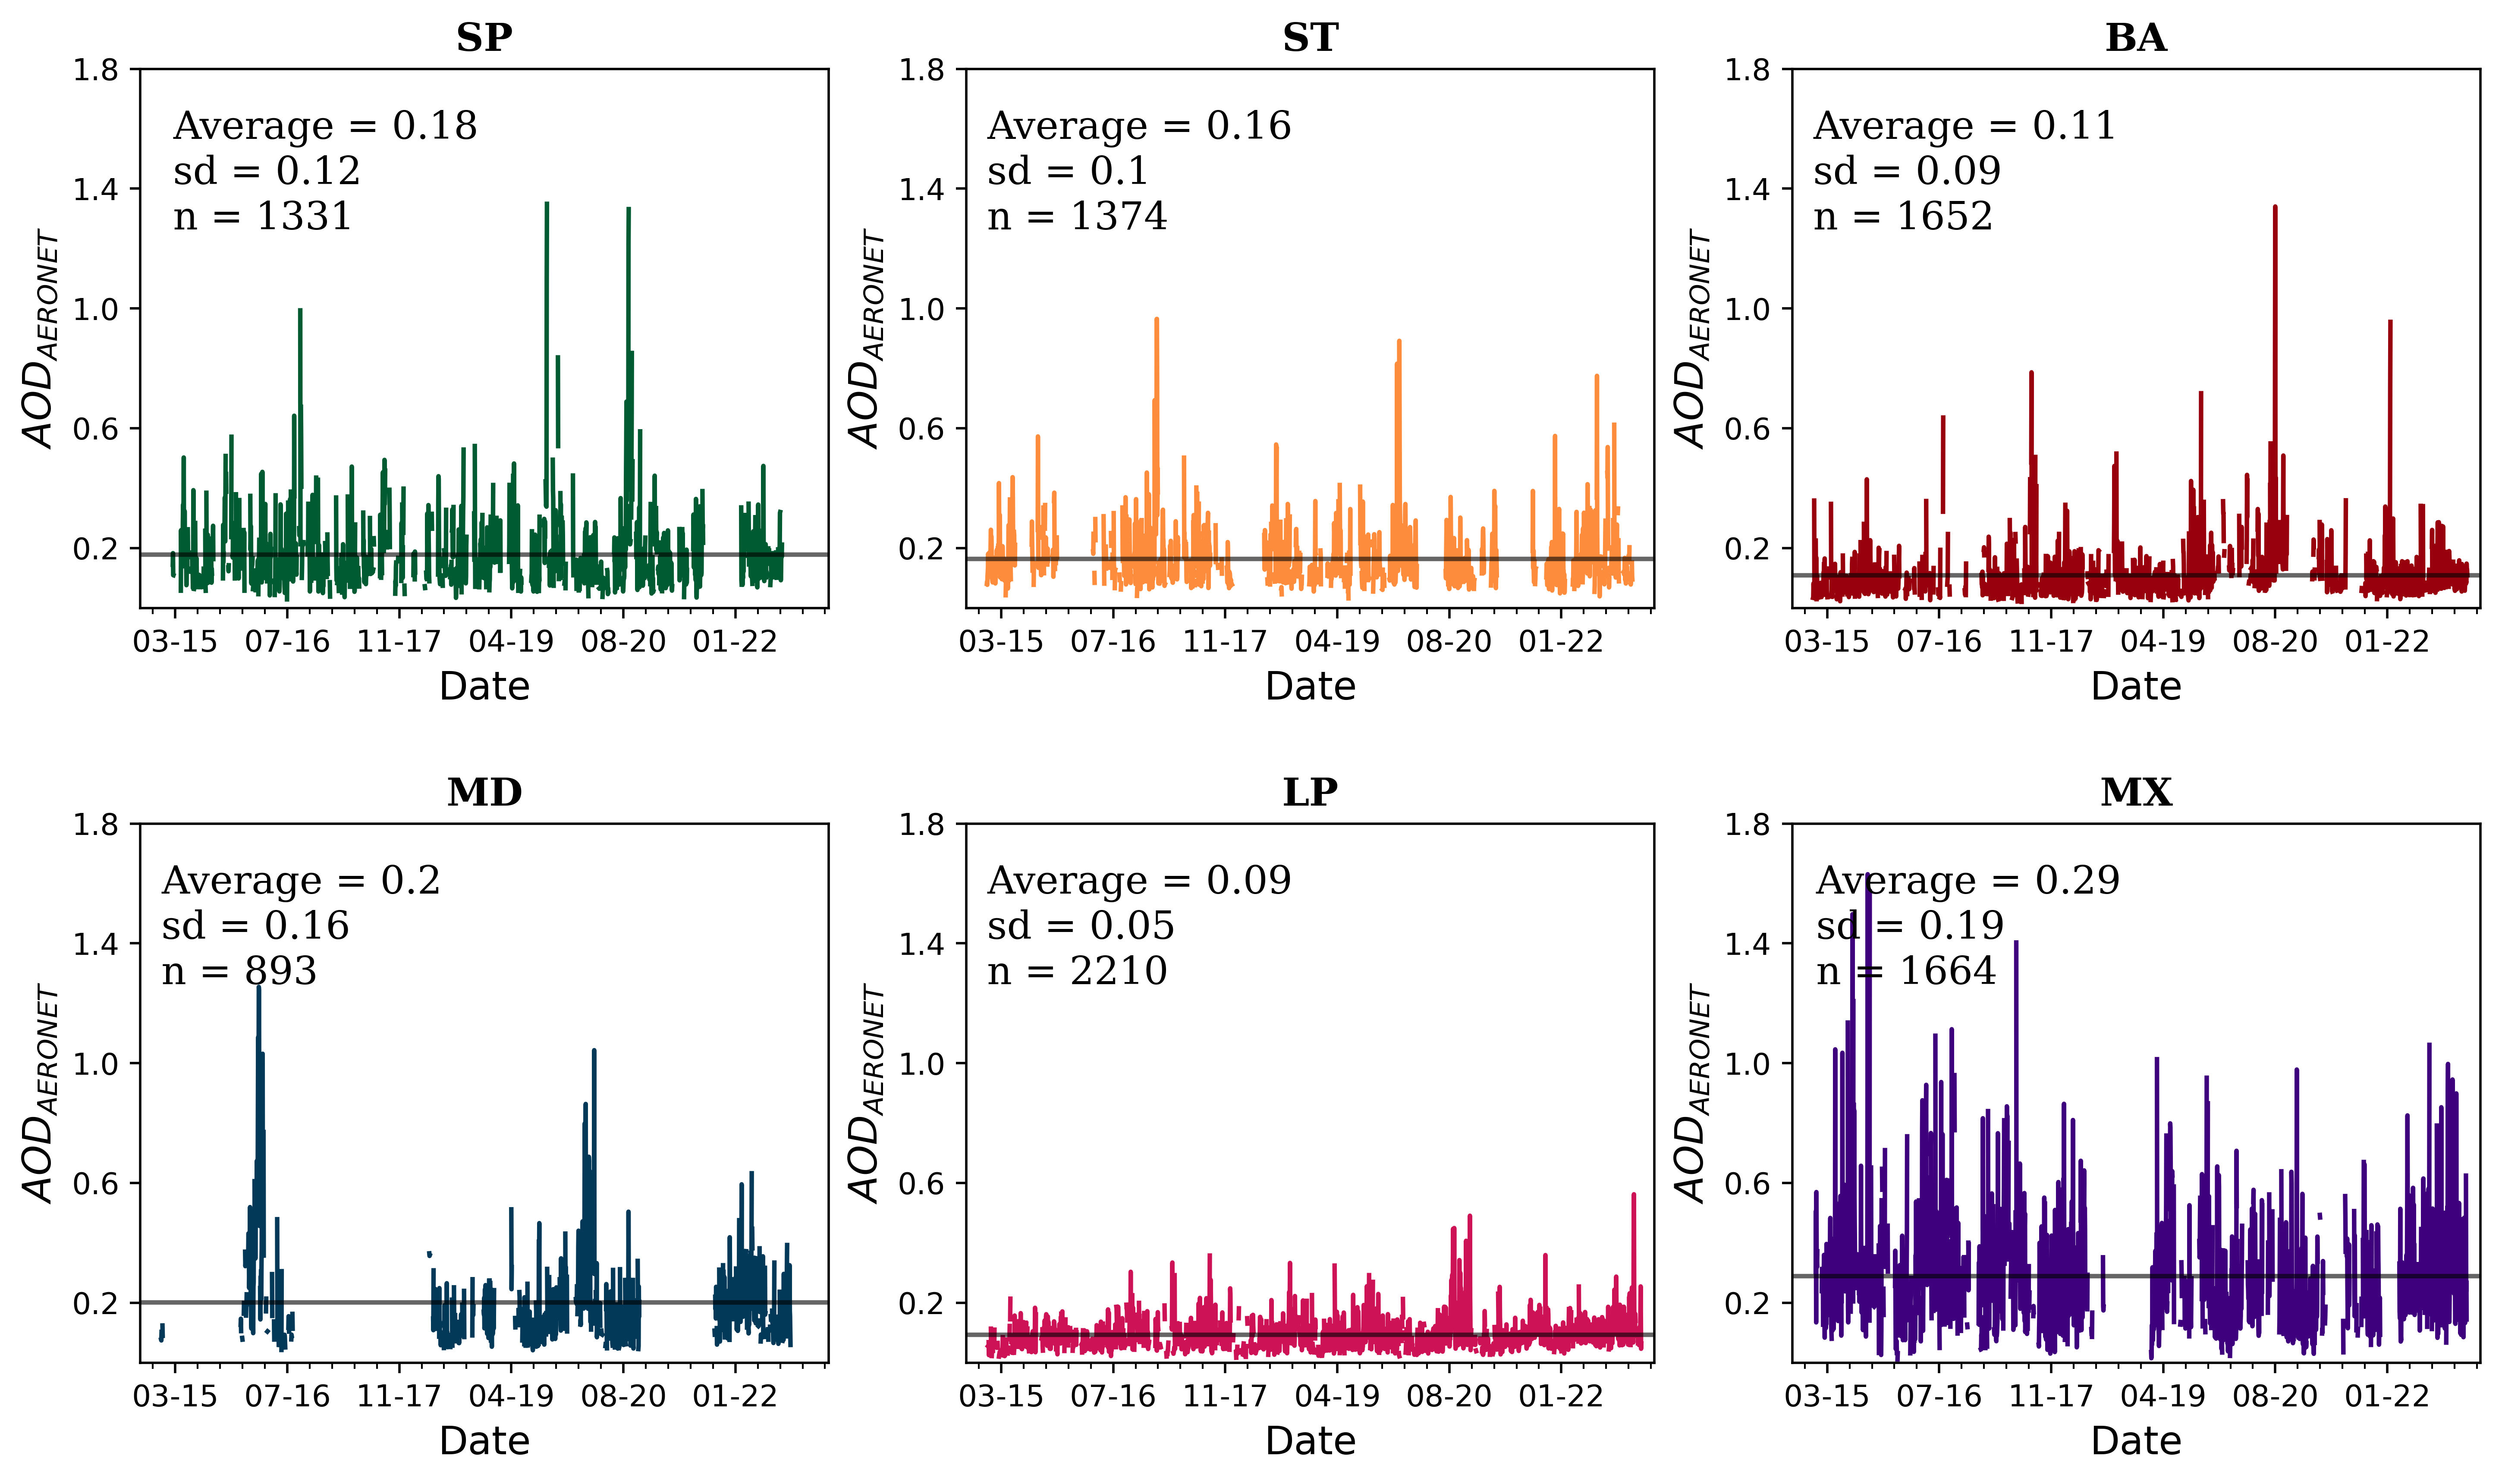

In [5]:
# Correr la funion para datos de LATAM
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/Latam",date_format='%Y-%m-%d %H:%M:%S',
              nrows=2,ncols=3, colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='no')


GS
GT
MS
CT
SL
UH


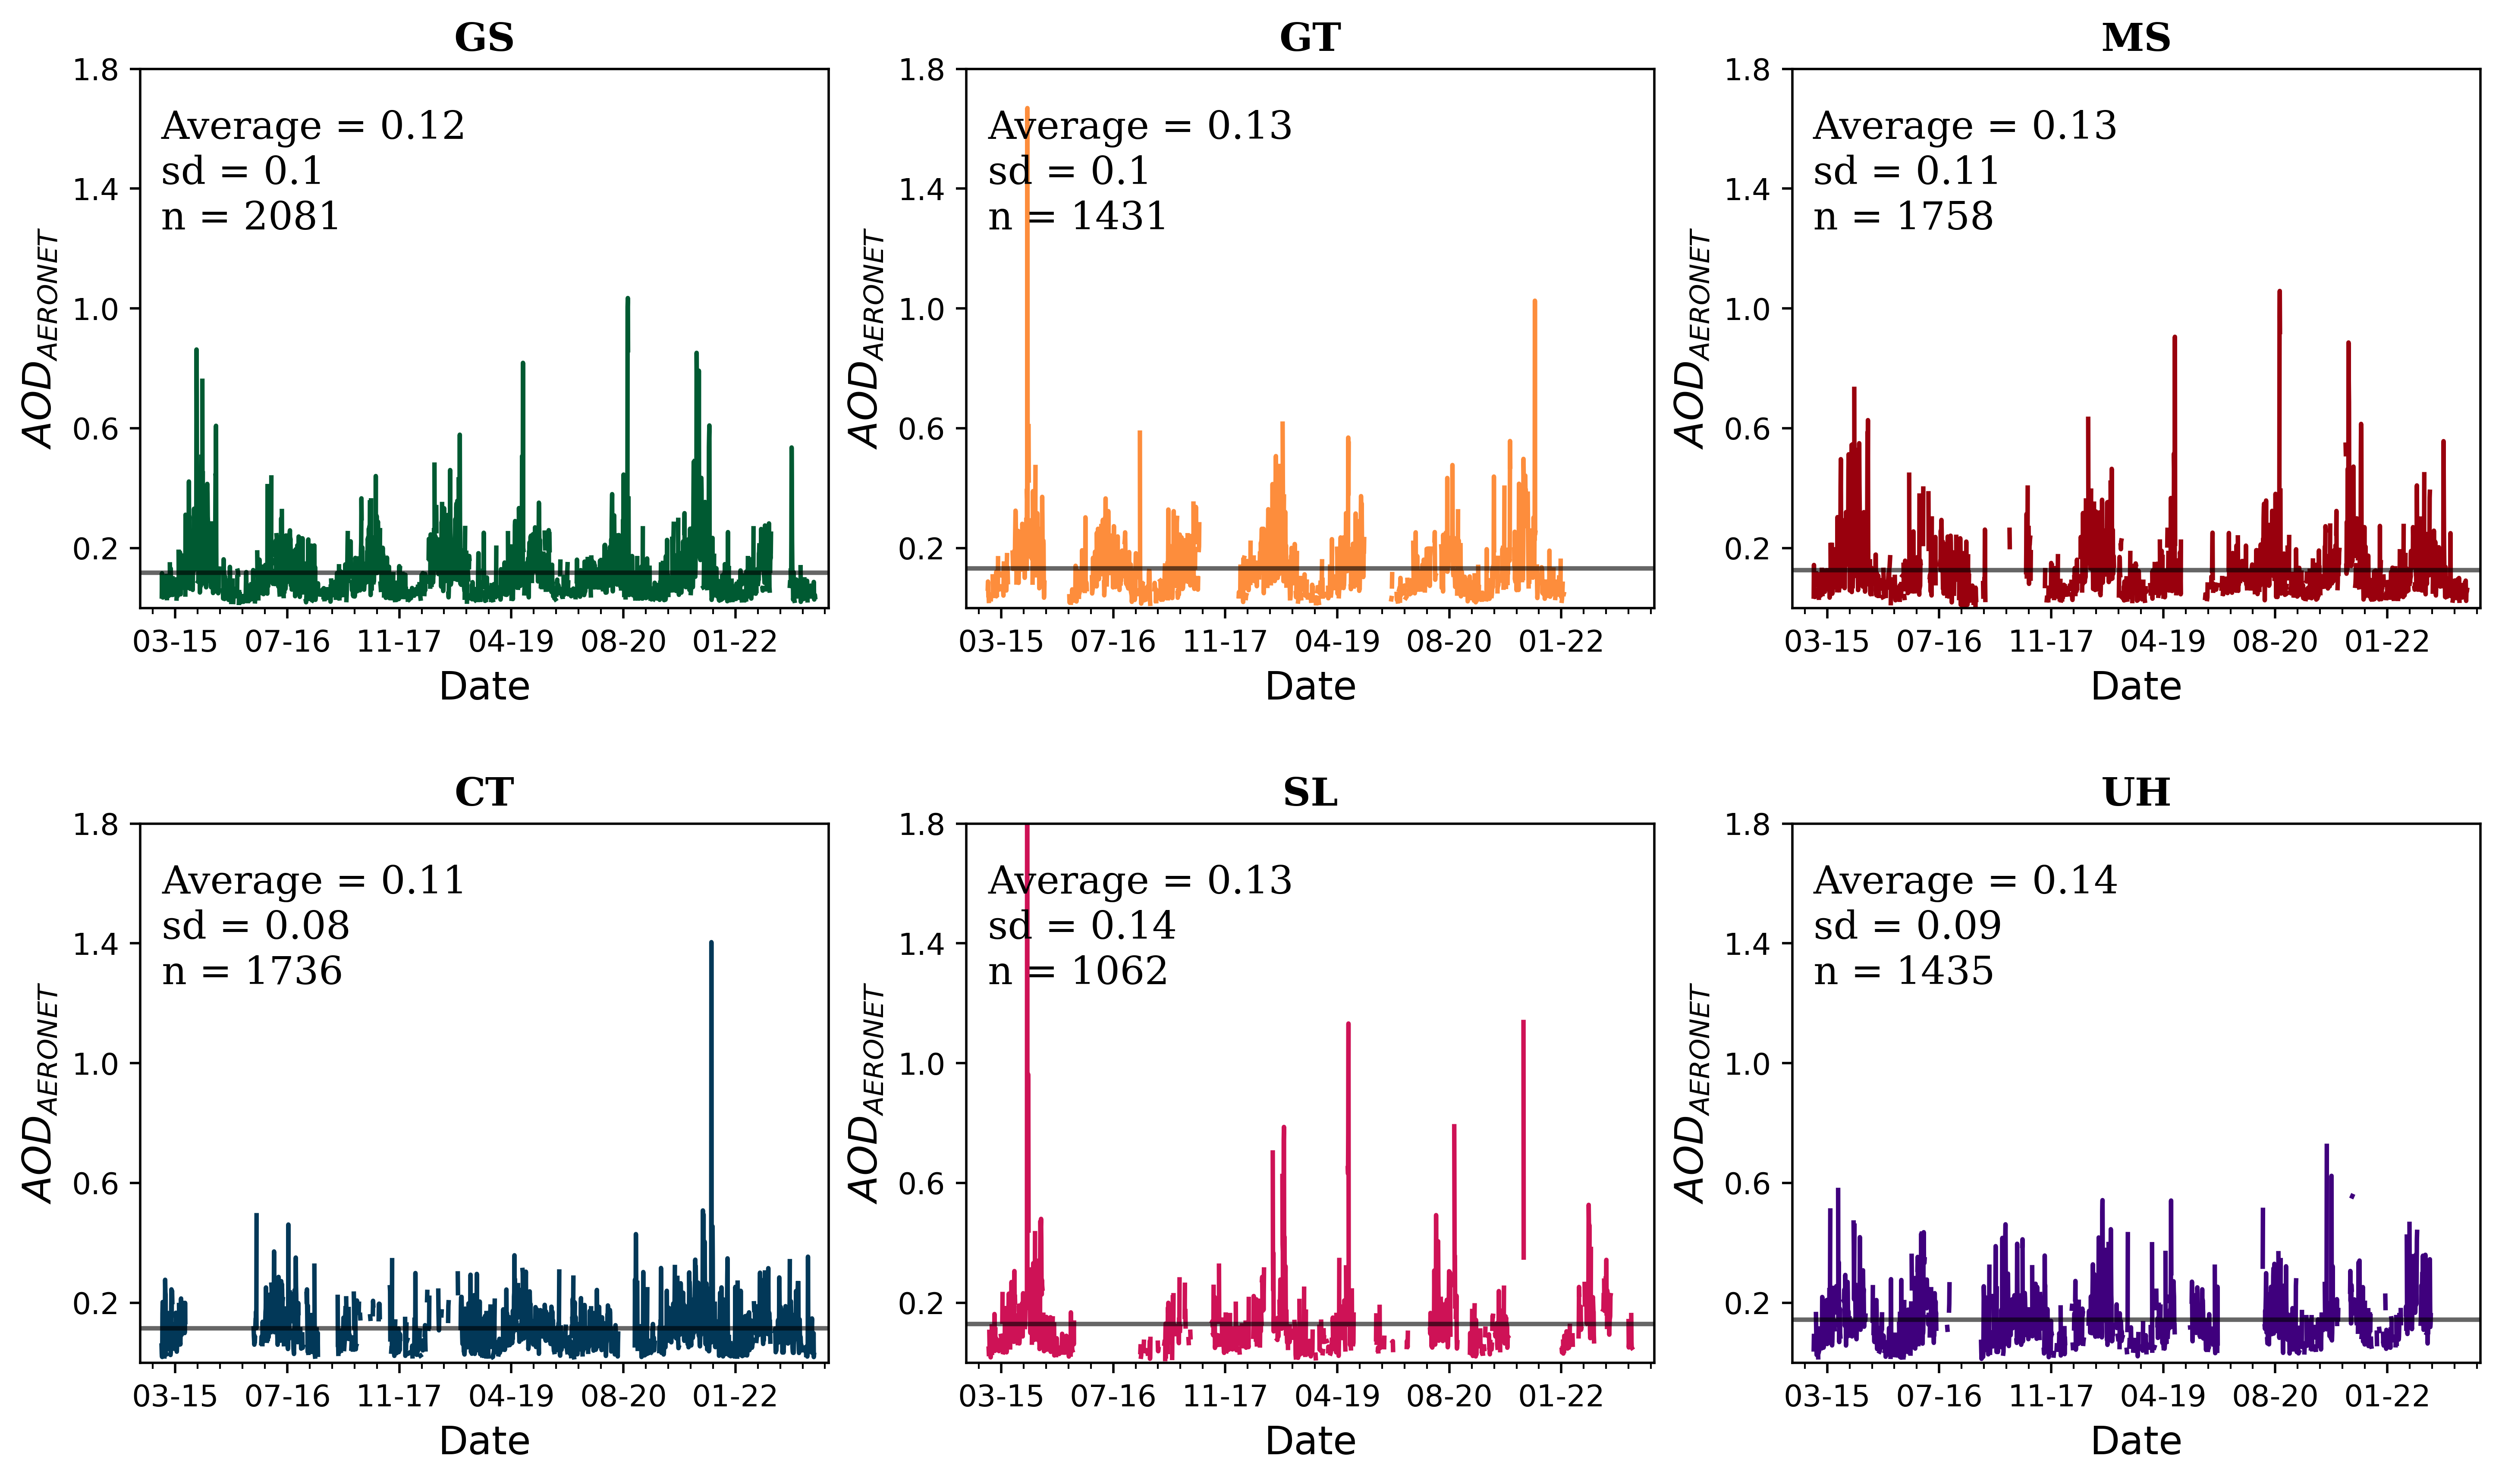

In [6]:
# Correr la funion para datos de estaciones USA
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/USA",date_format='%d/%m/%Y %H:%M',
              nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='no')


In [ ]:
def aeronet_histogram(path, date_format, nrows, ncols, colors, plot): 
    '''
Esta función genera histogramas de valores de AOD para cada estación AERONET.

Variables:
- path : Ruta a la carpeta donde se encuentran los archivos CSV.
- date_format: Formato de la columna de fecha en los archivos CSV.
- nrows: Número de filas en la cuadrícula de gráficos.
- ncols: Número de columnas en la cuadrícula de gráficos.
- colors: Lista de colores para cada estación AERONET.
- plot: 'save' para guardar el gráfico como imagen; de lo contrario, el gráfico se mostrará en pantalla.
'''

    i, j = 0, 0
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8), dpi=500)

    for p, file in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, file))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        data.set_index('Timestamp', inplace=True)
        
        # Seleccionamos los valores de AOD para el periódo de interés
        aod_values = data['aod_550']['2015-01-01':'2022-12-31'].dropna()
        aod_values = aod_values.resample('1D').mean()

        # Calculamos las métricas
        mean = aod_values.mean()
        std_dev = aod_values.std()
        data_count = len(aod_values)

        # Nombre de la estación
        station_name = file[2:4]

        ######################## PLOT ########################
        # Histograma
        ax[i][j].hist(aod_values, bins=20, color=colors[p], edgecolor='black', alpha=0.7, density=False)

        # Ajustes de los ejes
        ax[i][j].set_xlim(0, 1.6)
        ax[i][j].set_ylim(0, 850)

        # Mostramos las métricas en el gráfico
        ax[i][j].text(0.55, 0.9, f"Mean = {mean:.2f}", transform=ax[i][j].transAxes, fontsize=13)
        ax[i][j].text(0.55, 0.8, f"SD = {std_dev:.2f}", transform=ax[i][j].transAxes, fontsize=13)
#         ax[i][j].text(0.56, 0.7, f"n = {data_count}", transform=ax[i][j].transAxes, fontsize=13)
        
        ax[1][1].text(0.53, 0.7, f" ND = 11.37%", transform=ax[1][1].transAxes, fontsize=13) #LP
        ax[0][2].text(0.53, 0.7, f" ND = 12.97%", transform=ax[0][2].transAxes, fontsize=13) #BA
        ax[1][2].text(0.53, 0.7, f" ND = 12.59%", transform=ax[1][2].transAxes, fontsize=13) #MX
        ax[0][1].text(0.53, 0.7, f" ND = 13.03%", transform=ax[0][1].transAxes, fontsize=13)# ST
        ax[0][0].text(0.53, 0.7, f" ND = 15.32%", transform=ax[0][0].transAxes, fontsize=13) #SP
        ax[1][0].text(0.53, 0.7, f" ND = 48.50%", transform=ax[1][0].transAxes, fontsize=13) #MD
        
        # Títulos y etiquetas
        ax[i][j].set_title(station_name, fontsize=18, fontweight='bold')
        ax[i][j].set_xlabel(r'$AERONET_{AOD}$', fontsize=13)
        ax[i][j].set_ylabel('Frecuency', fontsize=13)

        # Ajuste del tamaño de los ticks
        ax[i][j].tick_params(axis='both', which='major', labelsize=12)

        # Actualizamos los índices de los subplots
        if j == ncols - 1:
            i += 1
            j = 0
        else:
            j += 1

    # Ajustamos el diseño del subplot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

    # Guardamos o mostramos el gráfico
    if plot == 'save':
        plt.savefig("aeronet_histogram.jpg", dpi=500)
    else:
        plt.show()



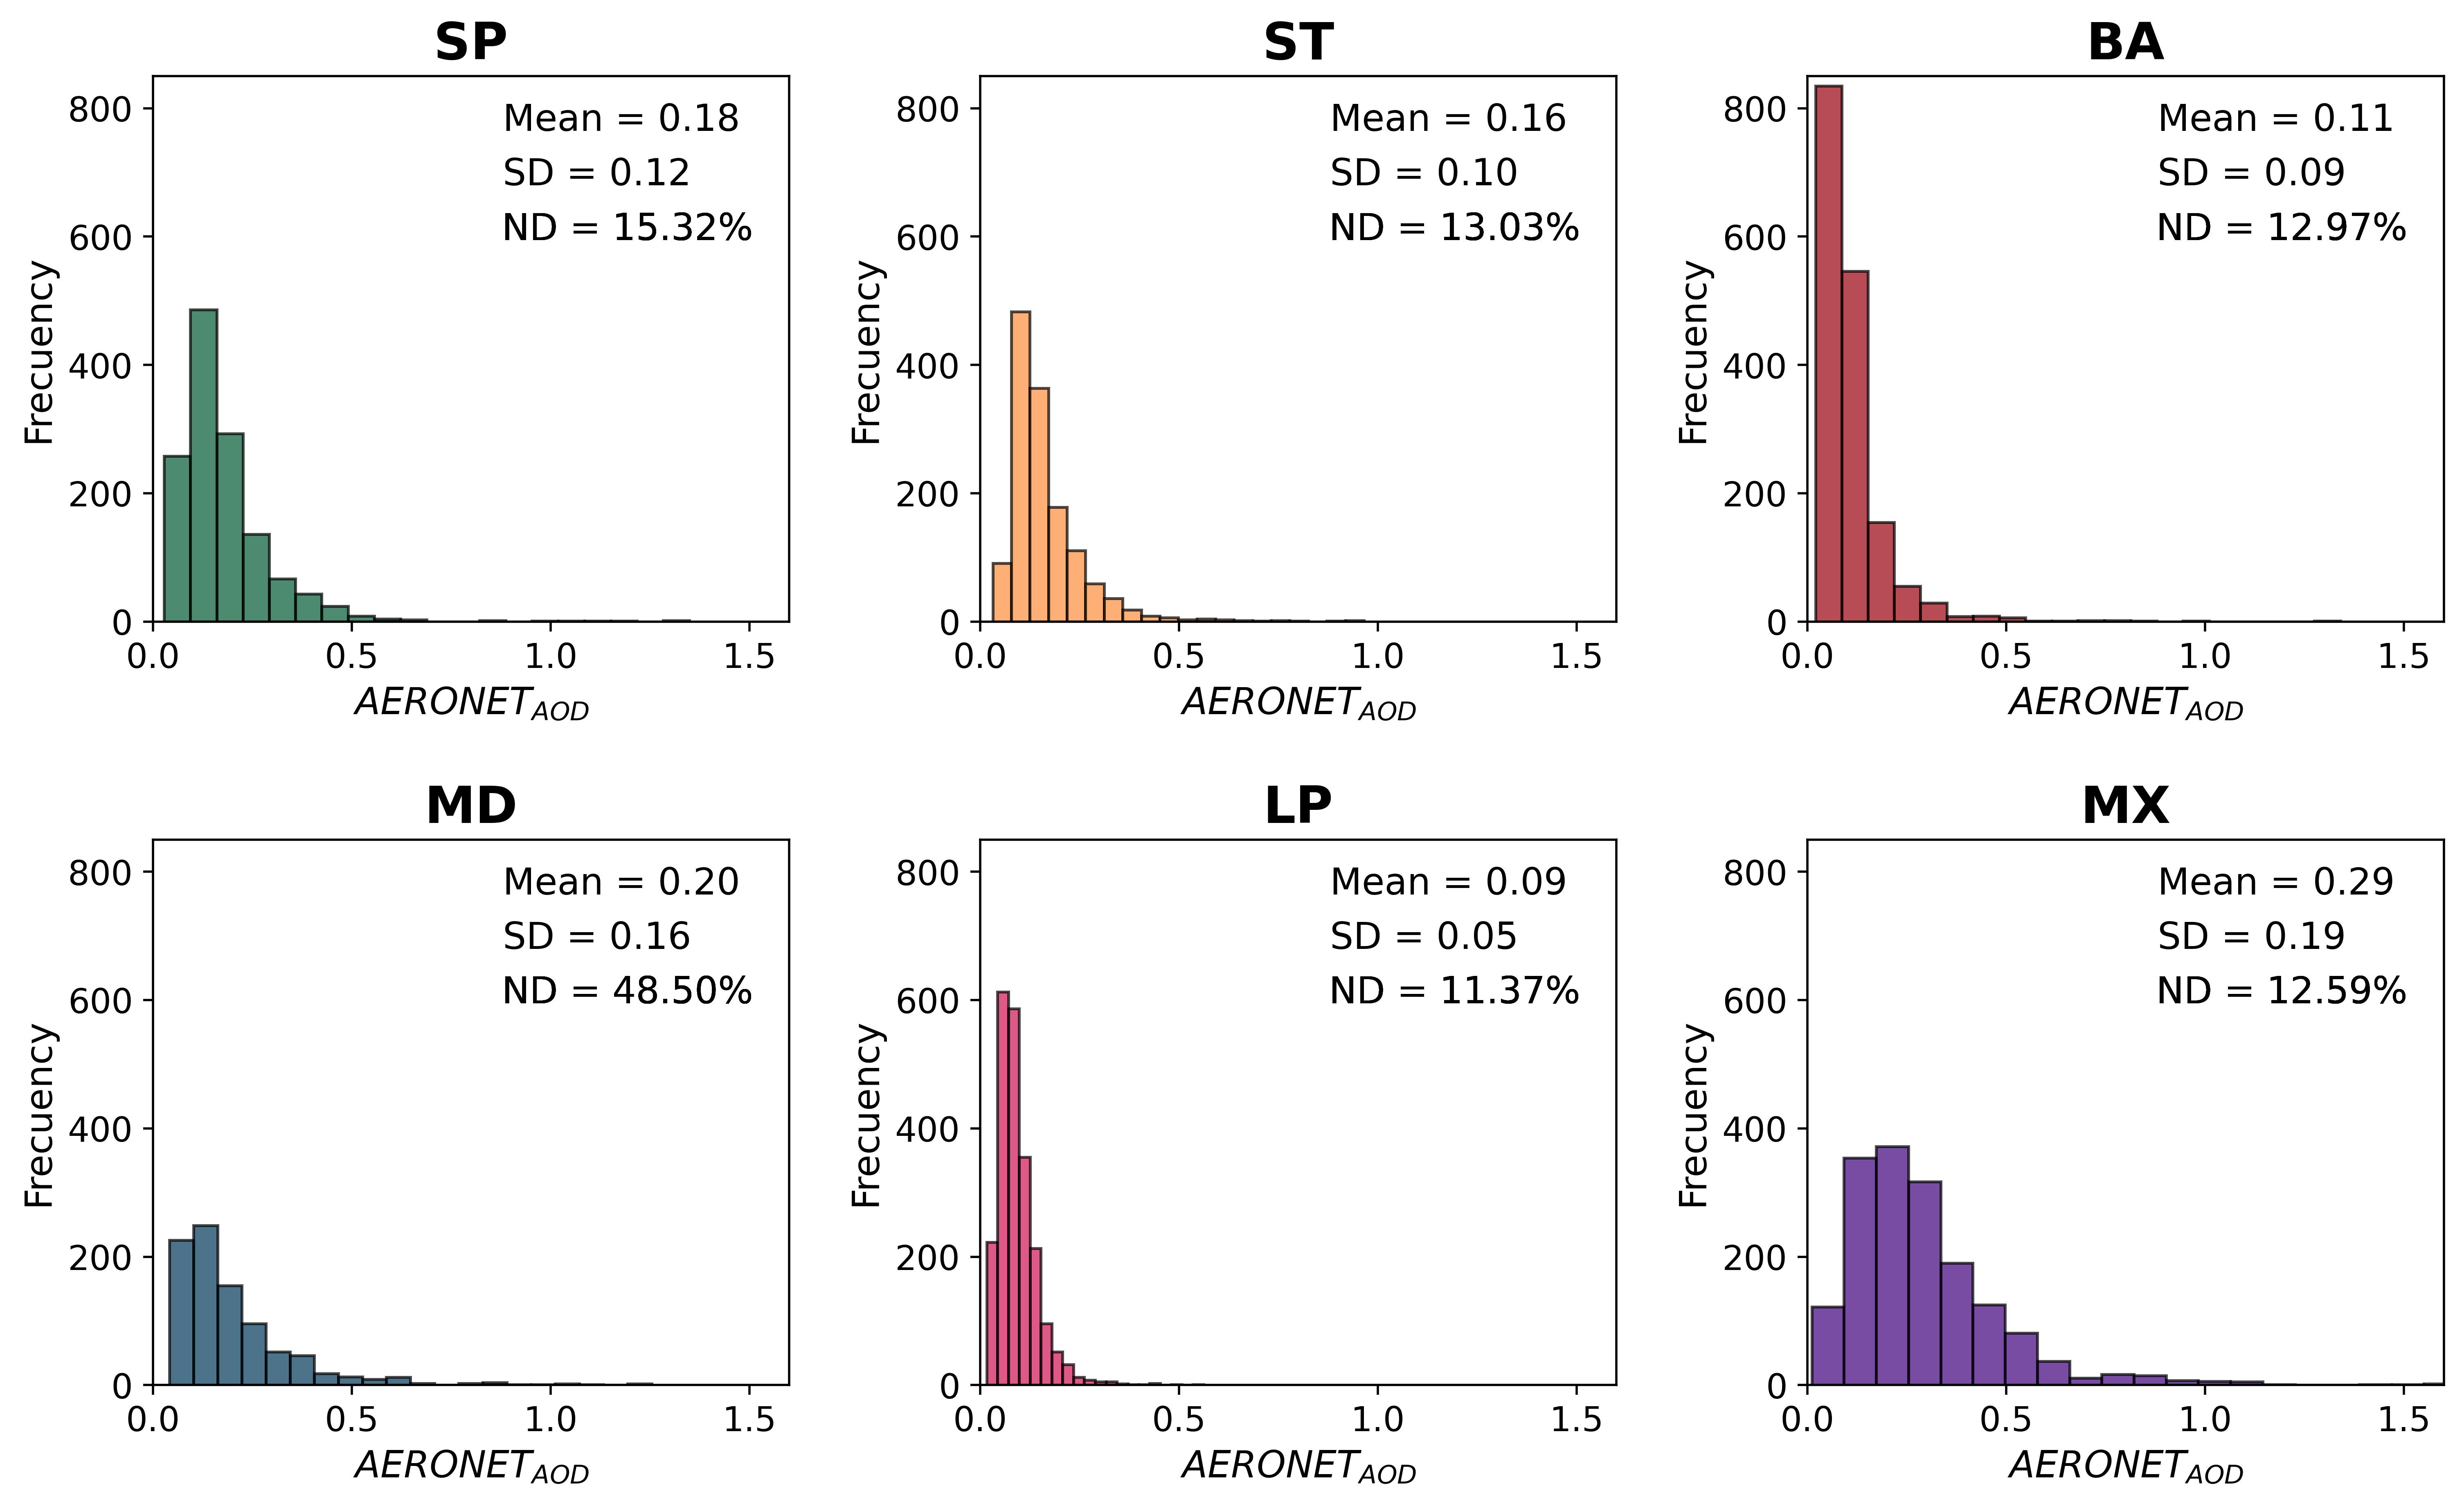

In [ ]:
# Histograma para LATAM
aeronet_histogram (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/Latam",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


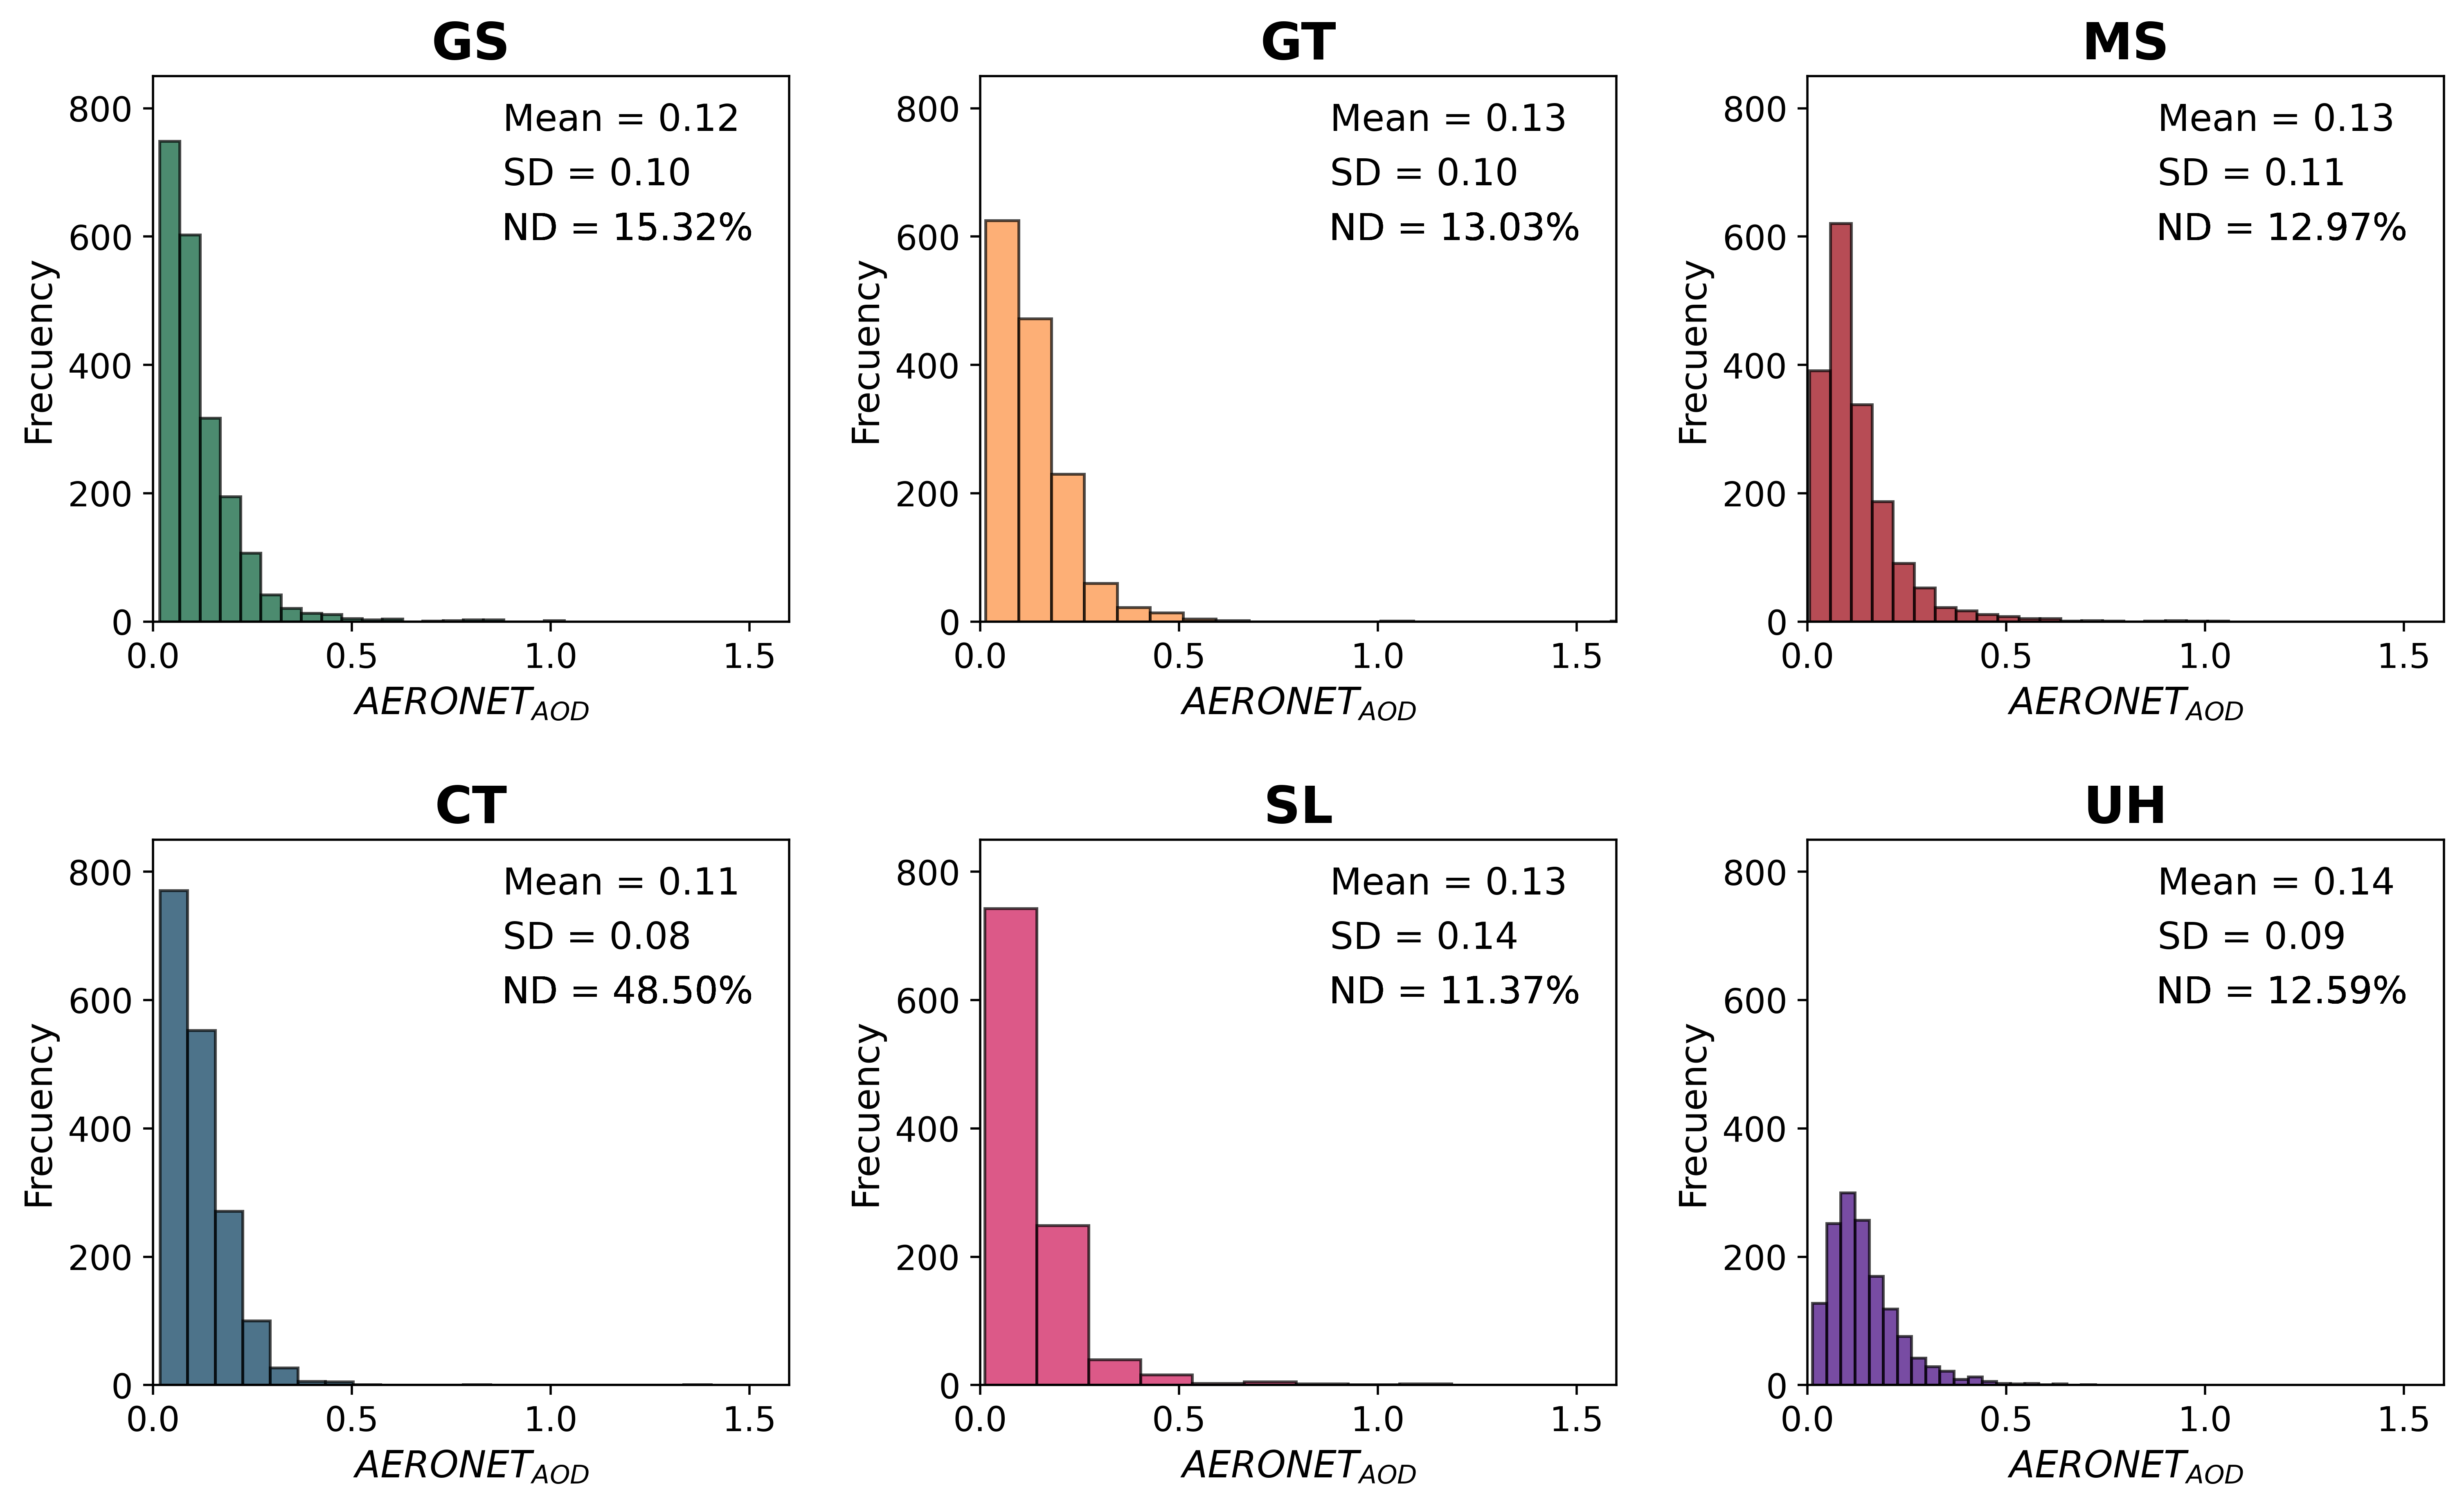

In [ ]:
# Histograma para USA
aeronet_histogram (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/USA",date_format='%d/%m/%Y %H:%M',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


In [ ]:
def aeronet_density_plot(path, date_format, nrows, ncols, colors, plot): 
    '''
Esta función genera gráficos de densidad (histograma con curva de densidad) de los valores de AOD para cada estación AERONET.

Variables:
- path : Ruta a la carpeta donde se encuentran los archivos CSV.
- date_format: Formato de la columna de fecha en los archivos CSV.
- nrows: Número de filas en la cuadrícula de gráficos.
- ncols: Número de columnas en la cuadrícula de gráficos.
- colors: Lista de colores para cada estación AERONET.
- plot: 'save' para guardar el gráfico como imagen; de lo contrario, el gráfico se mostrará en pantalla.
'''

    i, j = 0, 0
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8), dpi=500)

    for p, file in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, file))
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        data.set_index('Timestamp', inplace=True)
        
        # Seleccionamos los valores de AOD para el periódo de interés
        aod_values = data['aod_550']['2015-01-01':'2022-12-31'].dropna()
        aod_values = aod_values.resample('1D').mean()

        # Calculamos las métricas
        mean = aod_values.mean()
        std_dev = aod_values.std()
        data_count = len(aod_values)

        # Nombre de la estación
        station_name = file[2:4]

        ######################## PLOT ########################
        # Histograma con densidad
        ax[i][j].hist(aod_values, bins=20, color=colors[p], edgecolor='black', alpha=0.7, density=True)

        # Agregamos la curva de densidad utilizando seaborn
        sns.kdeplot(aod_values, ax=ax[i][j], color=colors[p], linewidth=2)

        # Ajustes de los ejes
        ax[i][j].set_xlim(0, 1.6)
        ax[i][j].set_ylim(0, 12)

        # Mostramos las métricas en el gráfico
        ax[i][j].text(0.55, 0.9, f"Mean = {mean:.2f}", transform=ax[i][j].transAxes, fontsize=12)
        ax[i][j].text(0.55, 0.8, f"SD = {std_dev:.2f}", transform=ax[i][j].transAxes, fontsize=12)
        #ax[i][j].text(0.56, 0.7, f"n = {data_count}", transform=ax[i][j].transAxes, fontsize=12)
        ax[1][1].text(0.53, 0.7, f" DF = 11.37%", transform=ax[1][1].transAxes, fontsize=12) #LP
        ax[0][2].text(0.53, 0.7, f" DF = 12.97%", transform=ax[0][2].transAxes, fontsize=12) #BA
        ax[1][2].text(0.53, 0.7, f" DF = 12.59%", transform=ax[1][2].transAxes, fontsize=12) #MX
        ax[0][1].text(0.53, 0.7, f" DF = 13.03%", transform=ax[0][1].transAxes, fontsize=12)# ST
        ax[0][0].text(0.53, 0.7, f" DF = 15.32%", transform=ax[0][0].transAxes, fontsize=12) #SP
        ax[1][0].text(0.53, 0.7, f" DF = 48.50%", transform=ax[1][0].transAxes, fontsize=12) #MD
        # Títulos y etiquetas
        ax[i][j].set_title(station_name, fontsize=16, fontweight='bold')
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$', fontsize=13)
        ax[i][j].set_ylabel('Density', fontsize=13)

        # Ajuste del tamaño de los ticks
        ax[i][j].tick_params(axis='both', which='major', labelsize=12)

        # Actualizamos los índices de los subplots
        if j == ncols - 1:
            i += 1
            j = 0
        else:
            j += 1

    # Ajustamos el diseño del subplot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

    # Guardamos o mostramos el gráfico
    if plot == 'save':
        plt.savefig("aeronet_density_plot.jpg", dpi=500)
    else:
        plt.show()


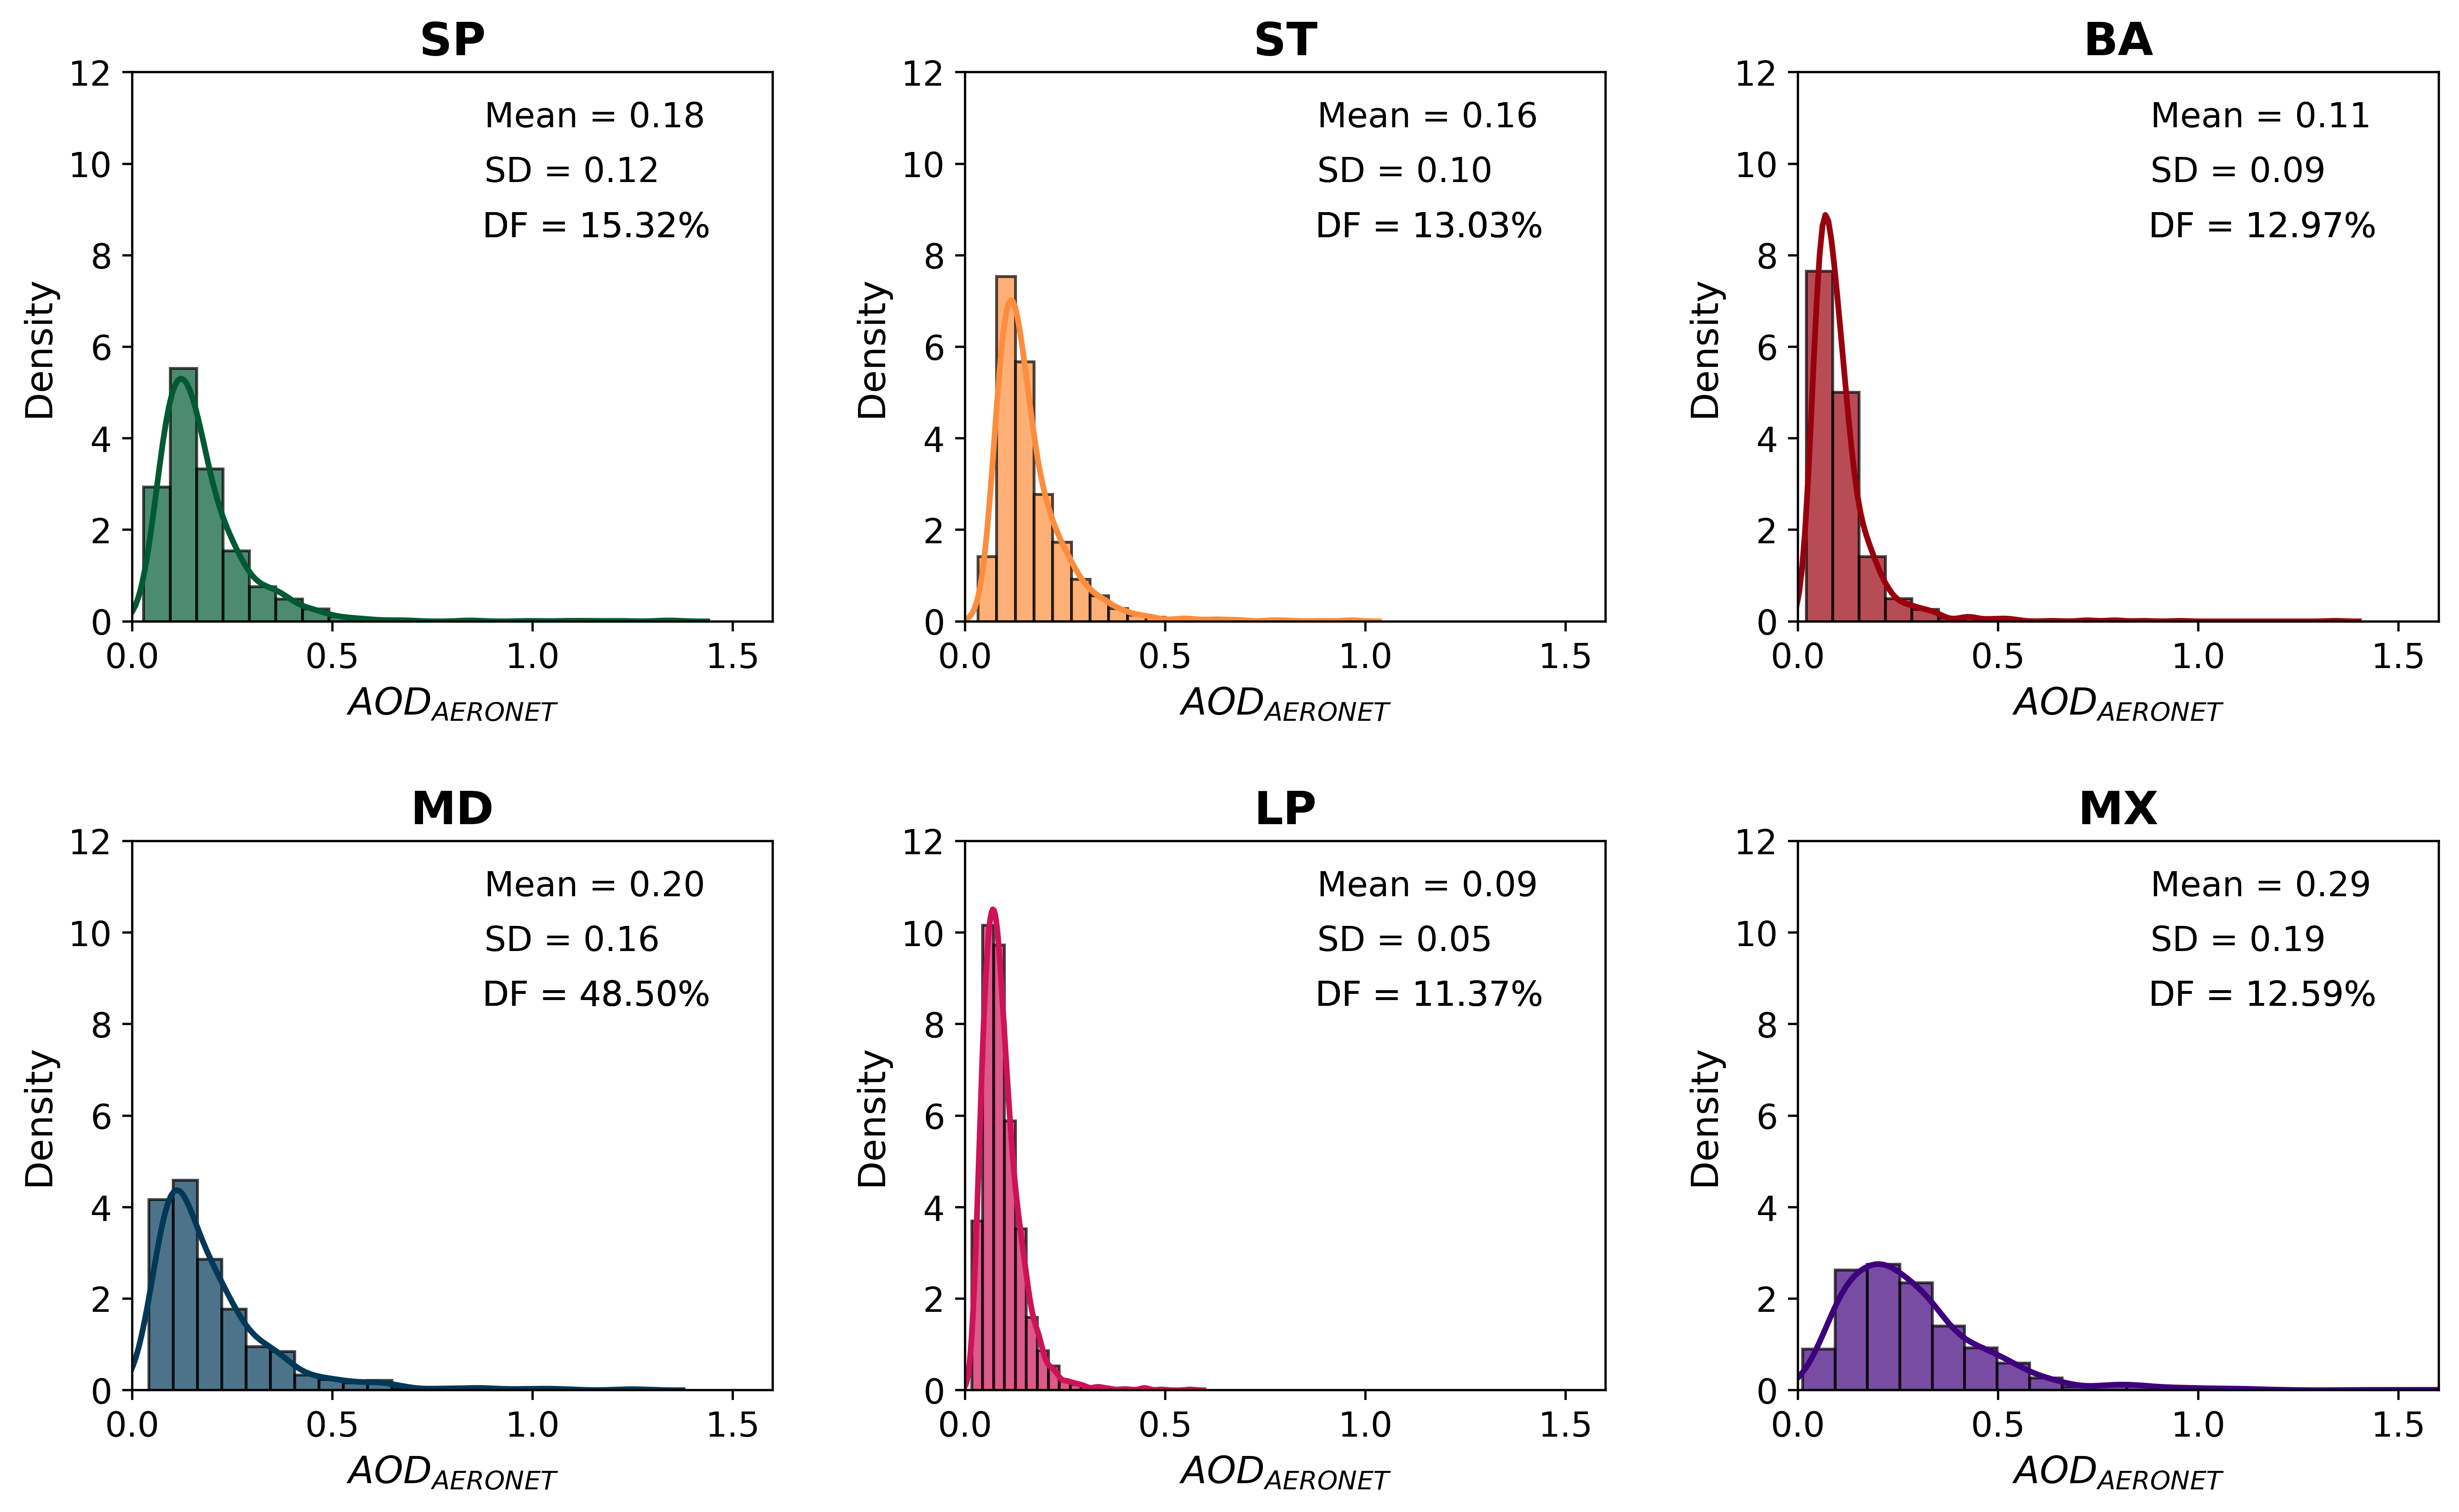

In [ ]:
# Histograma para LATAM
aeronet_density_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/Latam",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


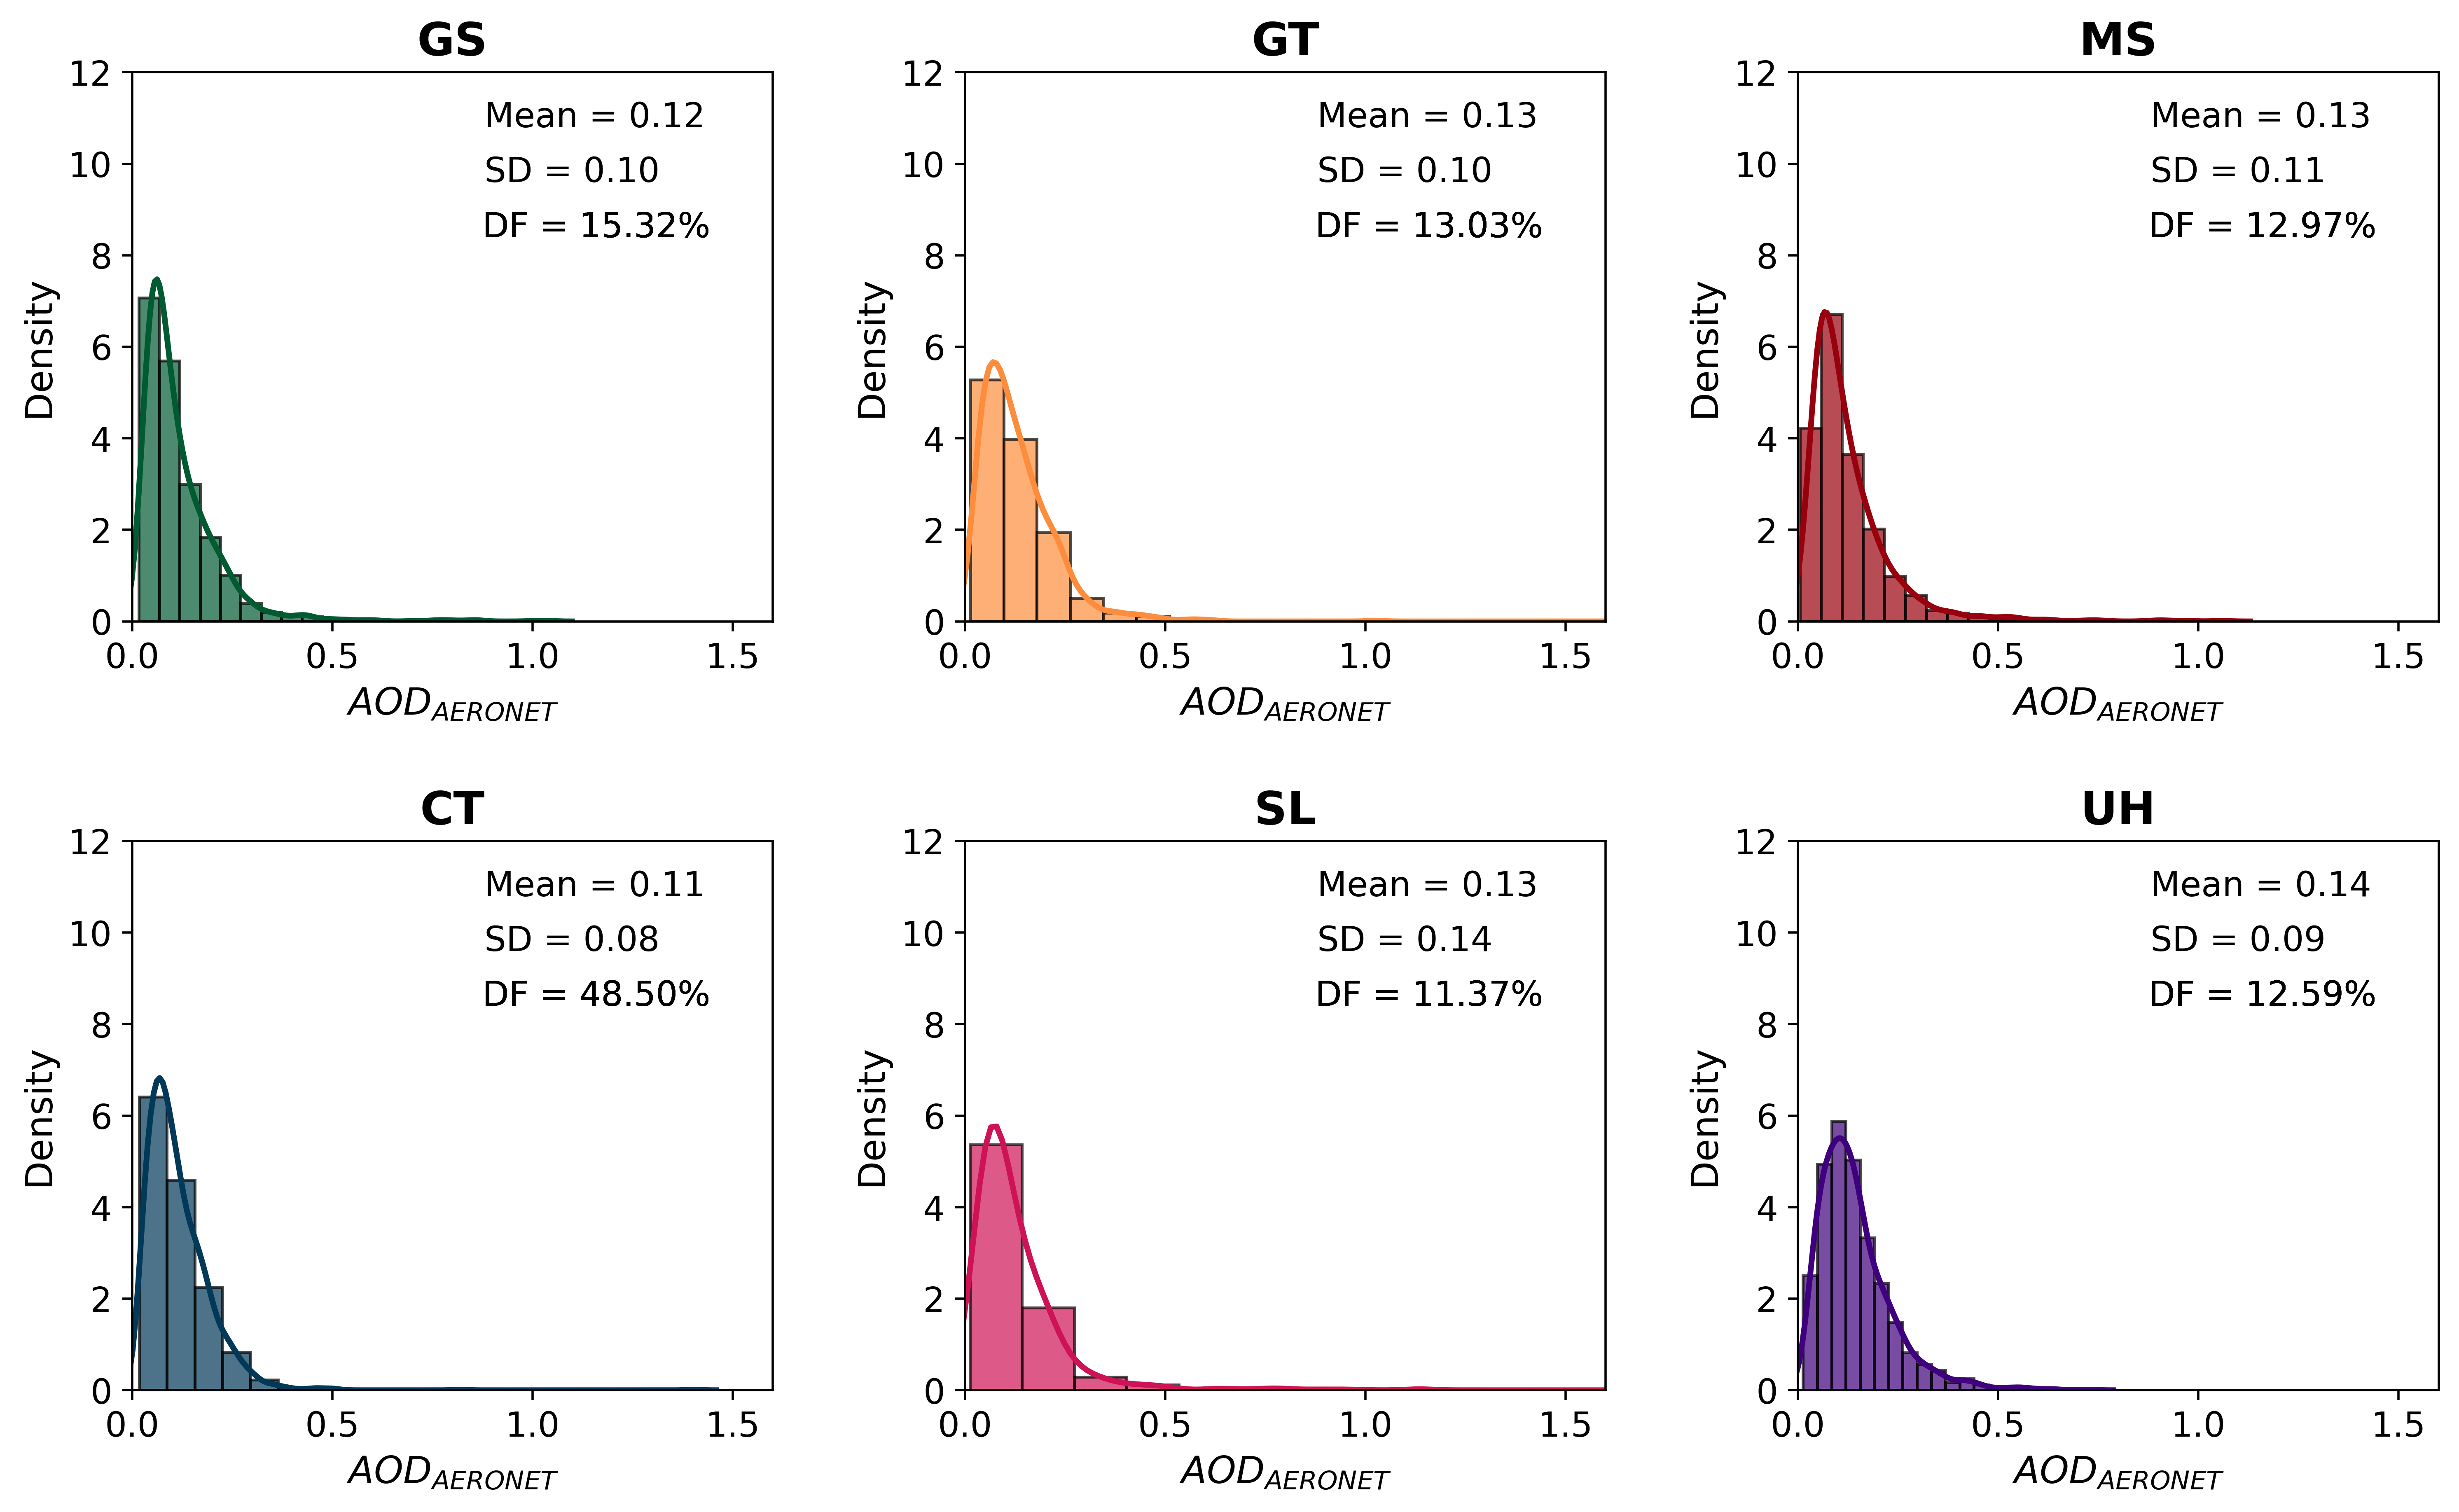

In [27]:
# Histograma para USA
aeronet_density_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/USA",date_format='%d/%m/%Y %H:%M',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')
